# Section 1: Business Understanding

## Prosper Marketplace Inc loan data analysis

In this exploration, will take a look at the data, and see how we might answer the questions about what variable could impact the reason why borrowers could fail to complete their payments.

### Questions will be exploring:
- Question1: At which income range people tend to apply for a loan more?
- Question2: what is the distribution of the employment status and what is the average income of each status?
- Question3: What variables that have an impact on whether the borrowers will complete their loans?

To get started, let's read in the necessary libraries we will need to wrangle our data: pandas and numpy. If we decided to build some basic plots, matplotlib might prove useful as well.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sb

%matplotlib inline

base_color = sb.color_palette()[2]
palette = sb.cubehelix_palette(start=2, rot=0, dark=0.2, light=.8, reverse=True, gamma=0.5)
heu_color = sb.color_palette()[1]

sb.set(rc={'axes.facecolor':'#e8e8e8', 'figure.facecolor':'#e8e8e8'})

# Section 2: Data Understanding

## Gather Data

In [2]:
# load in the dataset into a pandas dataframe
loans_df = pd.read_csv('prosperLoanData.csv')

## Assess Data

In [3]:
loans_df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
loans_df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [5]:
loans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

### Assesments:
- remove unwanted columns
- remove rows with no APR values, since we will be analyzing loans by their APR values.
- correct date types
- adding `IsLoanCompleated` column generated from `LoanStatus`
- cleaning `IncomeRange` column and convert is to ordinal categorecal value

# Section 3: Data Preparation

## Clean Data

In [6]:
def cleaning_income_ranges(monthly_income):
  '''
    INPUT
    monthly income - float
    
    OUTPUT
    income range - stinrg value of the income range the belongs to the input
    
    1. calculating the yearly income value
    2. categorize the value to the related income range
  '''

  x = monthly_income * 12

  # if x < 0 :
    # return '$0'
  
  if x >= 0 and x < 25000:
    return '$1-24,999'

  if x >= 25000 and x < 50000:
    return '$25,000-49,999'
  
  if x >= 50000 and x < 75000:
    return '$50,000-74,999'

  if x >= 75000 and x < 100000:
    return '$75,000-99,999'

  if x >= 100000:
    return '$100,000+'

In [7]:
def clean_laon_datframe(df):
  '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    cleaned_df - pandas datafram
    
    This function cleans df using the following steps:
    1. Remove unwanted columns
    2. Remove rows with no BorrowerAPR
    3. clean DebtToIncomeRatio data
    3. Change date columns to datetime type
    4. Add IsLoanCompleated column
    5. Clean income range column
    6. Add yearly incom column
    7. Clean Employment Status column
  '''
  
  # Removeing unwanted columns
  df = df[['LoanOriginalAmount', 'LoanOriginationDate', 'MonthlyLoanPayment',\
    'LoanMonthsSinceOrigination', 'ScorexChangeAtTimeOfListing', 'TotalProsperLoans', 'StatedMonthlyIncome',\
    'IncomeRange', 'DebtToIncomeRatio', 'BorrowerAPR', 'BorrowerRate' , 'LenderYield' ,'LoanStatus', 'ClosedDate',\
    'IsBorrowerHomeowner', 'EmploymentStatus','EmploymentStatusDuration' ,'ListingCategory (numeric)','OnTimeProsperPayments']]

  # Removeing rows with no BorrowerAPR values
  df = df[~df['BorrowerAPR'].isna()]

  # cleaning DebtToIncomeRatio data
  df['DebtToIncomeRatio']= df['DebtToIncomeRatio'].apply(lambda x: x if x <= 1 else 1)

  # Changeing date columns to datetime type
  df['LoanOriginationDate'] = pd.to_datetime(df['LoanOriginationDate'])
  df['ClosedDate'] = pd.to_datetime(df['ClosedDate'])

  # Adding IsLoanCompleated column
  df['IsLoanCompleated'] = df['LoanStatus'].apply(lambda x: "Completed" if x == "Completed" else 'Current' if x == 'Current' else "Not Completed")

  # Cleaning income range column
  df['IncomeRange'] = df['StatedMonthlyIncome'].apply(cleaning_income_ranges)
  ordered_ranges = pd.api.types.CategoricalDtype(ordered = True,
                categories = ['$100,000+',  '$75,000-99,999', '$50,000-74,999', '$25,000-49,999', '$1-24,999'])
  df['IncomeRange'] = df['IncomeRange'].astype(ordered_ranges)

  # Adding yearly incom column
  df['YearlyIncome'] = df['StatedMonthlyIncome'] * 12

  return df


In [8]:
loans_df_cleaned = clean_laon_datframe(loans_df)

In [9]:
loans_df_cleaned['IncomeRange'].unique()

['$25,000-49,999', '$50,000-74,999', '$1-24,999', '$100,000+', '$75,000-99,999']
Categories (5, object): ['$100,000+' < '$75,000-99,999' < '$50,000-74,999' < '$25,000-49,999' < '$1-24,999']

In [10]:
loans_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113912 entries, 0 to 113936
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   LoanOriginalAmount           113912 non-null  int64         
 1   LoanOriginationDate          113912 non-null  datetime64[ns]
 2   MonthlyLoanPayment           113912 non-null  float64       
 3   LoanMonthsSinceOrigination   113912 non-null  int64         
 4   ScorexChangeAtTimeOfListing  18928 non-null   float64       
 5   TotalProsperLoans            22085 non-null   float64       
 6   StatedMonthlyIncome          113912 non-null  float64       
 7   IncomeRange                  113912 non-null  category      
 8   DebtToIncomeRatio            113912 non-null  float64       
 9   BorrowerAPR                  113912 non-null  float64       
 10  BorrowerRate                 113912 non-null  float64       
 11  LenderYield               

# Section 4: Evaluate the Results

## Question1: At which income range people tend to apply for a loan more?

**IncomeRange**

In [11]:
def countplot_with_percentage(df, x_variable, hue=None, title=''):
  '''
    INPUT
    df - pandas dataframe
    x_variable - string, column name
    hue - string, column name
    title - string, chart title

    OUTPUT
    void - display matplotlib chart
    
    1. displaying a count plot of a dataframe varible
    2. adding a second variable to the plot (if any) using the hue parameter
    3. display the percentages of each bar
  '''
  fig, ax = plt.subplots(figsize=[10, 5])
  
  two_palettes=[base_color,heu_color]
  set_palette = palette if hue and df[f'{hue}'].nunique() > 2 else two_palettes if hue and df[f'{hue}'].nunique() == 2 else None
  
  ax = sb.countplot(data = df, x = x_variable, hue=hue, color = base_color, palette=set_palette)

  for bar in ax.patches:
    # get hight of the bar from bar
    pct_string = '{:0.1f}%'.format(100*bar.get_height()/df.shape[0])

    plt.text(bar.get_x() + bar.get_width() /2, bar.get_height(), pct_string, ha='center', va='bottom', color='black')

  plt.title(title)
  sb.despine()

  plt.show()

In [12]:
def bar_plot_avg_yearly_income(df, x_variable, hue=None, title=''):
  '''
    INPUT
    df - pandas dataframe
    x_variable - string, column name
    hue - string, column name
    title - string, chart title

    OUTPUT
    void - display matplotlib chart
    
    1. displaying a count plot of the dataframe varible by the Average yearly income
    2. adding a second variable to the plot (if any) using the hue parameter
    3. display the percentages of each bar
  '''

  fig, ax = plt.subplots(figsize=[10, 5])

  two_palettes=[base_color,heu_color]
  set_palette = palette if hue and df[f'{hue}'].nunique() > 2 else two_palettes if hue and df[f'{hue}'].nunique() == 2 else None
  
  sb.barplot(data=df, x=x_variable, y='YearlyIncome', hue=hue, color=base_color, errwidth=0, palette=set_palette)
  sb.despine()

  plt.ylabel('Avg. YearlyIncome ($)');

In [13]:
def bar_plot_avg_loan_amount(df, x_variable, hue=None, title='', no_x_title=False):
  '''
    INPUT
    df - pandas dataframe
    x_variable - string, column name
    hue - string, column name
    title - string, chart title

    OUTPUT
    void - display matplotlib chart
    
    1. displaying a count plot of the dataframe varible by the Average loan ammount
    2. adding a second variable to the plot (if any) using the hue parameter
    3. display the percentages of each bar
  '''
  fig, ax = plt.subplots(figsize=[10, 5])

  two_palettes=[base_color,heu_color]
  set_palette = palette if hue and df[f'{hue}'].nunique() > 2 else two_palettes if hue and df[f'{hue}'].nunique() == 2 else None
  
  sb.barplot(data=df, x=x_variable, y='LoanOriginalAmount', hue=hue, color=base_color, errwidth=0, palette=set_palette)
  # plt.xticks(rotation=15)
  sb.despine()
  
  if no_x_title:
    plt.ylabel('')

  plt.ylabel('Avg. Loan Original Amount ($)');

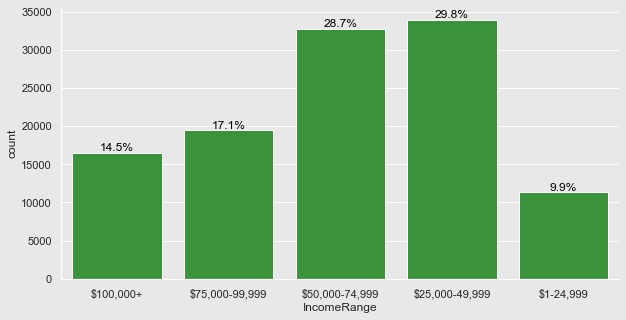

In [14]:
# plot the IncomeRange variable

countplot_with_percentage(loans_df_cleaned, 'IncomeRange', hue=None, title='')

Looking at the income rage distribution in the dataset, we can see it is showing a high amount of loans was made by the middle ranges incomes (between $75,000 and $25,000).

## Question2: what is the distribution of the employment status and what is the average income of each status?

In [15]:
# loans_df_cleaned[loans_df_cleaned['EmploymentStatus'].isna()]
loans_df_cleaned['EmploymentStatus'].unique()

array(['Self-employed', 'Employed', 'Not available', 'Full-time', 'Other',
       nan, 'Not employed', 'Part-time', 'Retired'], dtype=object)

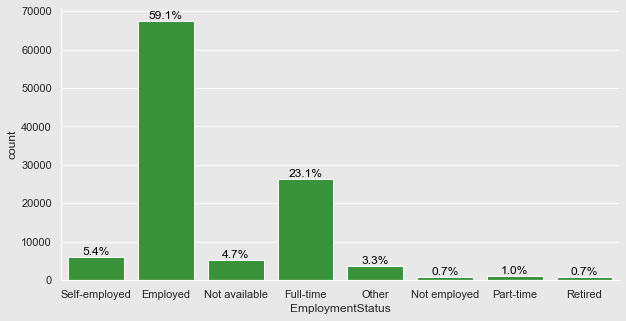

In [16]:
countplot_with_percentage(loans_df_cleaned, 'EmploymentStatus', hue=None, title='')

the plot is showing that most of the borrowers where employed, eather full or part time.  

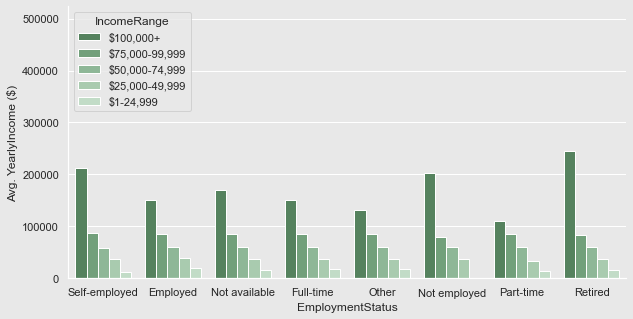

In [18]:
bar_plot_avg_yearly_income(loans_df_cleaned, 'EmploymentStatus', hue='IncomeRange', title='')

Interestingly, despite the high number of employed borrowers in the dataset, their highest income recorded is still lower than the income values for other status like the self-employed or not employed borrowers. Probably due to personal business income. Which makes me thinking on considering to start looking for my own business. 

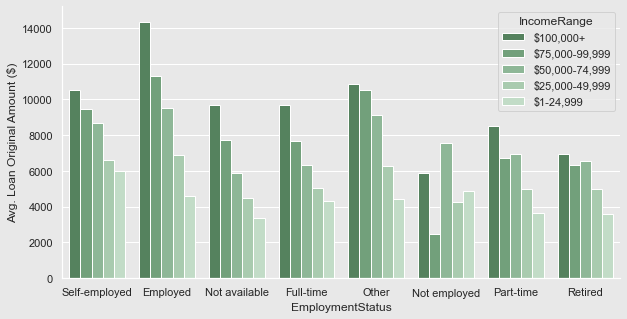

In [19]:
bar_plot_avg_loan_amount(loans_df_cleaned,  'EmploymentStatus', hue='IncomeRange')

## Question3: What variables that have an impact on whether the borrowers will complete their loans?

### A) Exploring loan ammount variable with the loan completion

In [20]:
# dividing the dataset based on loan completion 
completed_loans = loans_df_cleaned['IsLoanCompleated'] == 'Completed'
not_completed_loans = loans_df_cleaned['IsLoanCompleated'] == "Not Completed"
current_loans = loans_df_cleaned['IsLoanCompleated'] == 'Current'

**IsLoanCompleated**

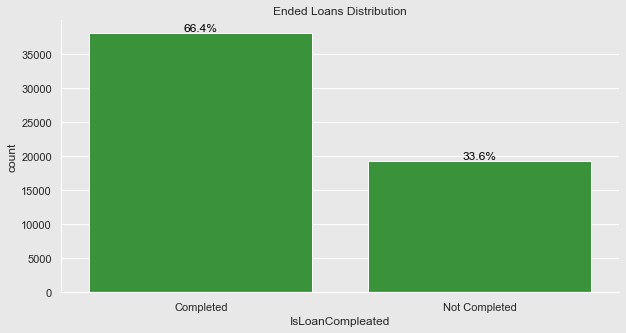

In [21]:
# plot the IsLoanCompleated variable

countplot_with_percentage(loans_df_cleaned[completed_loans | not_completed_loans], 'IsLoanCompleated', title='Ended Loans Distribution')

This plot is showing that around 66% of the loans in the dataset are completed, while around 33% of borrowers didn't complete their loans, while other loans are still in progress that are not plotted.

**LoanOriginalAmount vs YearlyIncome**

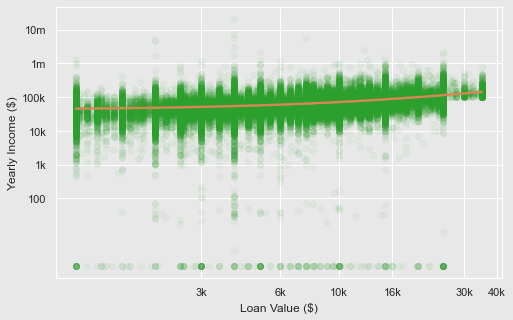

In [22]:
# plot the IsLoanCompleated variable

plt.figure(figsize=[8, 5])
# plt.scatter(data = loans_df_cleaned, x = 'LoanOriginalAmount', y = 'YearlyIncome', alpha=1/10)

sb.regplot(data = loans_df_cleaned, x = 'LoanOriginalAmount', y = 'YearlyIncome',   scatter_kws={'alpha':1/20}, color=base_color, line_kws={"color": "C1"})

plt.xscale('log')
plt.yscale('log')
plt.xticks([3e3, 6e3, 1e4, 16e3, 3e4, 4e4], ['3k', '6k', '10k', '16k', '30k', '40k'])
plt.yticks([1e2, 1e3, 1e4, 1e5, 1e6, 1e7], ['100', '1k', '10k', '100k', '1m', '10m'])
plt.xlabel('Loan Value ($)')
plt.ylabel('Yearly Income ($)')
# plt.xlim(loans_df_cleaned['LoanOriginalAmount'].min()-100, loans_df_cleaned['LoanOriginalAmount'].max()+1000)
plt.show()

loan values showing a slight linear increase with the yearly income. also showing some high loan values with borrowers that don't have income recorded in the dataset. will use the income rages instead of the income values to have a better chart representation.

**LoanOriginalAmount vs IncomeRange**

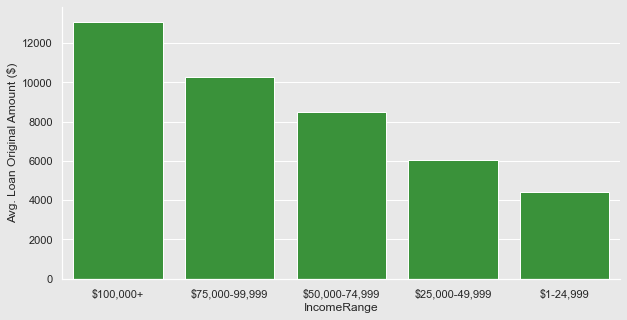

In [23]:
bar_plot_avg_loan_amount(loans_df_cleaned,'IncomeRange')

This plot showing the average loan amounts against the borrowers income range, and it is expected to see that the higher the income, the more loans amount we’ll see.

**LoanOriginalAmount vs IsLoanCompleated**

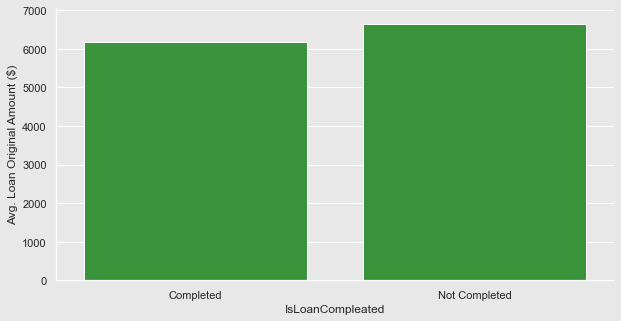

In [24]:
bar_plot_avg_loan_amount(loans_df_cleaned[completed_loans | not_completed_loans], 'IsLoanCompleated', no_x_title=True)

Loans that didn't complete is not highly related to the ammount of loans.  

**IsLoanCompleated vs IncomeRange**

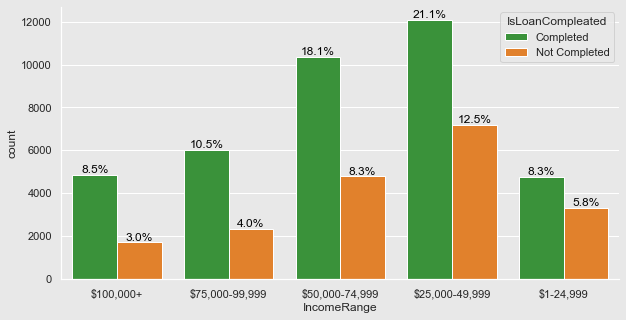

In [25]:
countplot_with_percentage(loans_df_cleaned[completed_loans | not_completed_loans], 'IncomeRange', hue='IsLoanCompleated', title='')

All borrowers in the dataset coming from deferent income rages has the same chance of not completing their loans. except for the lower income range the has a higher change not to complete the loan.

**IsLoanCompleated vs IncomeRange by LoanOriginalAmount**

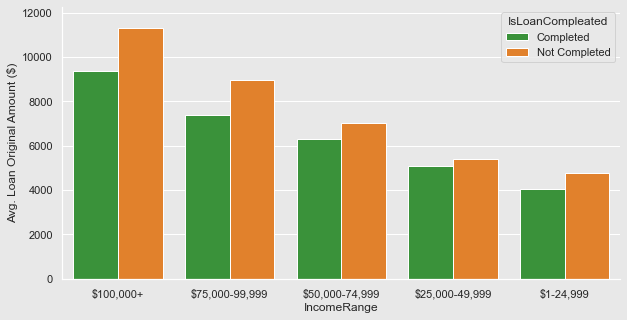

In [26]:
bar_plot_avg_loan_amount(loans_df_cleaned[completed_loans | not_completed_loans],'IncomeRange', hue='IsLoanCompleated')

By plotting the loan amounts with respect to the income range and the loan completions, we can see that every income range has a kind of threshold loan amount where it can put them into the risk of not completing their loans on time. but what determines this threshold? 

In [27]:
def heat_map_avg_loan(df):
  '''
    INPUT
    df - pandas dataframe

    OUTPUT
    void - display matplotlib chart
    
    1. get the average laon values for each income range by loan completionr
    2. display the the heatmap of the pivoted values
  '''

  means = df.groupby(['IncomeRange', 'IsLoanCompleated']).mean()['LoanOriginalAmount']
  means = means.reset_index(name = 'loans_avg')
  means = means.pivot(index = 'IsLoanCompleated', columns = 'IncomeRange',
                              values = 'loans_avg')

  fig, ax = plt.subplots(figsize = [15,5])

  sb.heatmap(means, annot = True, fmt = '.2f', annot_kws={'fontsize':15}, cmap="Greens",
            cbar_kws = {'label' : 'mean(Loan Original Amount)'})
  plt.ylabel('', fontsize=13)
  plt.xlabel('')
  plt.title('Avarage loans that will impact loan completions for every income range', fontdict={'fontsize': 15}, pad=20);

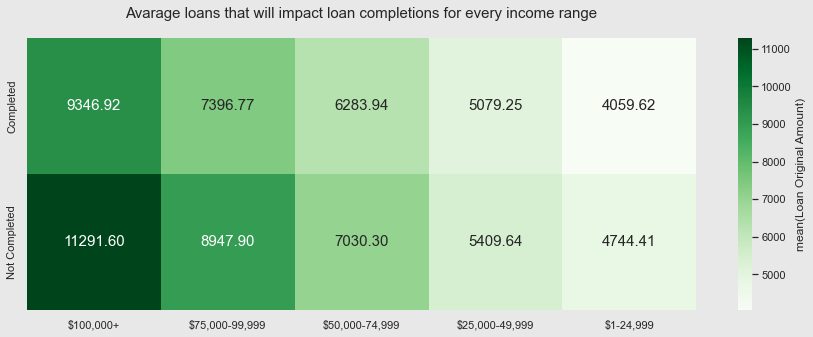

In [28]:
heat_map_avg_loan(loans_df_cleaned[completed_loans | not_completed_loans])

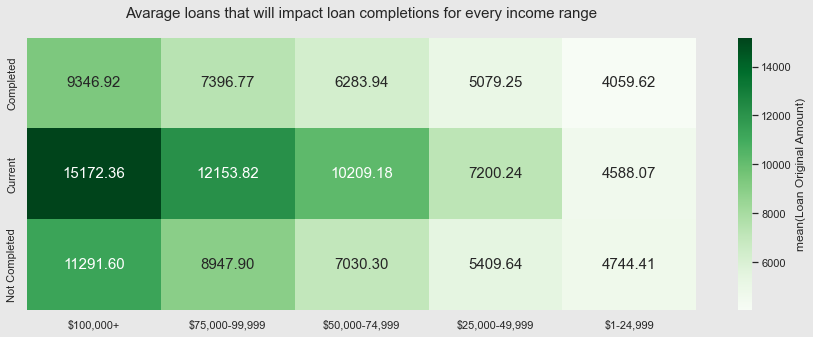

In [29]:
heat_map_avg_loan(loans_df_cleaned)

comparing the completion averages with the current loans averages, we can see that the current loans has higher values than the loans that are nor compleated, which will put these loans to high risk of not completing the logs. 

### B) Exploring APR variable with the loan completion

In [30]:


def completion_violin_plot(df):
  '''
    INPUT
    df - pandas dataframe

    OUTPUT
    void - display matplotlib chart
    
    displaying a violin plot of loan completion be the borrower APR
  '''

  fig, ax = plt.subplots( figsize=[8, 7])

  sb.violinplot(data = df, x = 'IsLoanCompleated', y = 'BorrowerAPR',
              color = base_color)

  ax.yaxis.set_major_formatter(mtick.PercentFormatter())
  plt.show()

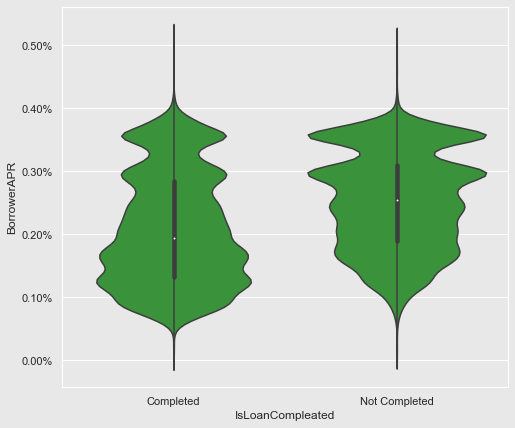

In [31]:
completion_violin_plot(loans_df_cleaned[completed_loans | not_completed_loans])

We can see on the above plot that higher APR value will impact the loan completions, the higher the APR value (above 20%), will have a higher chance of not completing the loan.

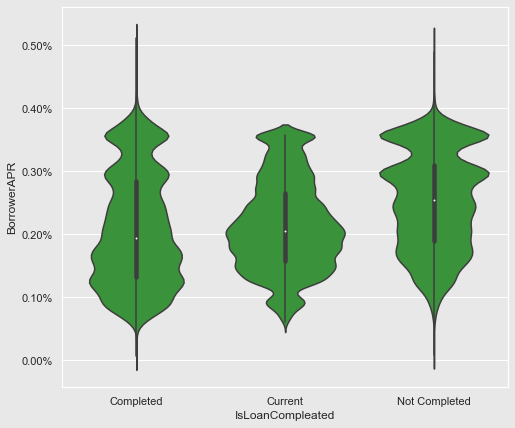

In [32]:
completion_violin_plot(loans_df_cleaned)

comparing the APR values with the current loans, we can the current loans APR distribution has similar to the completed loans, which can add a better chance of completing these loans.